# Figure 1


All plots in the manuscript are done with DPI = 600. In the jupyter notebook I changed it to *200*


# Packages required

Run it all at the same time to get the plots 

In [21]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# Asthetics

In [22]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713"]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": 1, 'axes.linewidth':1, 
                                  "xtick.major.width":1,"ytick.major.width":1}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863)]

# Figure 1C

In [23]:
click = pd.read_csv("Figure1C_Click.csv", index_col=0)
control = pd.read_csv("Figure1C_Control.csv", index_col=0)


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 (-0.1, 2.1),
 (-2.0, 10.0)]

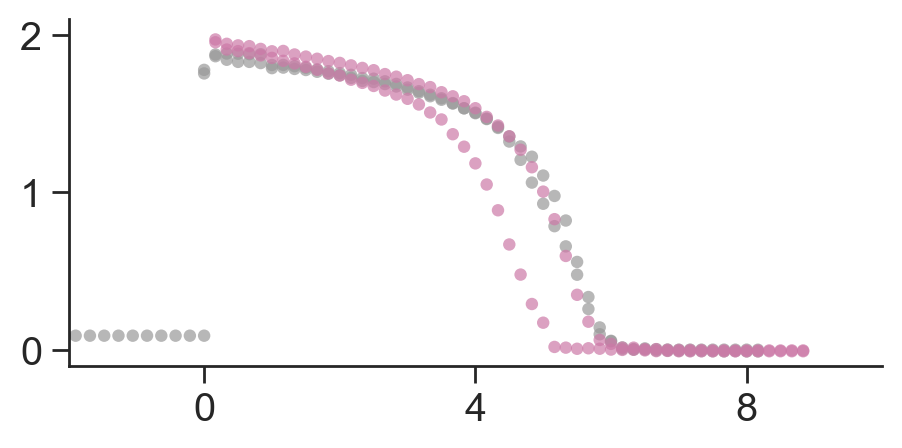

In [24]:
fig, ax = plt.subplots(figsize=(5.25, 2.25), dpi=200)

sns.scatterplot(data = control, x = "Time", y = "value", ax = ax, 
                color = "C3", edgecolor = "none", s = 20, alpha = .7)

sns.scatterplot(data = click.query("Time < 9 & Time > 0"), x = "Time", y = "value", ax = ax, # Time was cropped at 9 min so all points are alligned.
                color = "C2", edgecolor = "none", s = 20, alpha = .7)

sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 8, 3), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-2., 10))


# Figure 1F

In [25]:
control = pd.read_csv("Figure1F_Click_no_droplets.csv")
droplets = pd.read_csv("Figure1F_Click_droplets.csv")


In [26]:
def sigmoid(x, x0, k, a, b):
    y = (a-b) / (1 + np.exp(-k*(x-x0)))
    return y
def fit_sigmoid(df, p0, reagent = "T"):
    i = df[['time',reagent]].dropna(how = "any").reset_index(drop = True)
    popt, pcov = curve_fit(sigmoid, 
                           i['time'].values,
                           i[reagent].values,method='lm',
                           p0 = p0)
    t50 = popt[0]
    ks = 1/popt[1]
    lag = t50 - 2*ks

    results_fit = t50, ks, lag

    xfit = np.linspace(i['time'].min(), i['time'].max(), 1000)
    yfit = sigmoid(xfit, *popt)
    df_fit = pd.DataFrame({'xfit': xfit, 'yfit':yfit})
    return results_fit, df_fit


In [27]:
a = fit_sigmoid(control, p0 = (.1, 0,1,0))
b = fit_sigmoid(droplets, p0 = (.1, 0,1,.2))


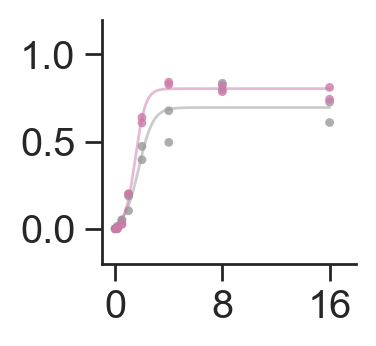

In [28]:
d = [control, droplets]


fig, ax = plt.subplots(figsize = (2.15,2), dpi = 200)

i = 10
sns.scatterplot(data=d[0], x="time", y="T", ax=ax, color="C3", s=i, alpha=0.8, edgecolor="none")
ax.plot(a[1]["xfit"], a[1]["yfit"], c = "C3", alpha = 0.5)

sns.scatterplot(data=d[1], x="time", y="T", ax=ax, color="C2", s=i, alpha=0.8, edgecolor="none")
ax.plot(b[1]["xfit"], b[1]["yfit"], c = "C2", alpha = 0.5)



ax.set(xlabel = "", ylabel = "", 
        xticks = np.linspace(0, 16, 3),xlim =  (-1, 18), 
        yticks = np.linspace(0, 1, 3), ylim = (-.2, 1.2))


sns.despine(fig, top=True, right=True)
plt.tight_layout()